In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('./dataset/testSet.txt',sep='\t',names=['X','Y'])
print(data.head())
data=np.array(data)
print(data.shape)

        X       Y
0  2.7266  3.0102
1  3.1304  2.4673
2  3.0492  2.5250
3  3.2260  3.1649
4  2.7223  2.5713
(400, 2)


# Kmeans 算法步骤
## 1.选择初始化的 k 个样本作为初始聚类中心 ；
## 2.针对数据集中每个样本 计算它到 k 个聚类中心的距离并将其分到距离最小的聚类中心所对应的类中；
## 3.针对每个类别  ，重新计算它的聚类中心
## 4.重复上面 2 3 两步操作，直到达到某个中止条件（迭代次数、最小误差变化等）。

In [3]:
#定义距离算法
def distance(sample,dataset):
    "输入矩阵（1行n列，m行n列），输出shape（m,）"
    #print("利用广播机制，计算sample1到dataset全部的距离")
    data=np.sum((dataset-sample)**2,axis=1)
    data=np.sqrt(np.float32(data))
    return data
#定义聚簇中心算法
def center(dataset):
    "输入shape(x,2)，输出shape(1,2)"
    Xmin=dataset[:,0]
    Ymin=dataset[:,1]
    return np.array([np.mean(Xmin),np.mean(Ymin)])
def MyKMeans(data:np.array,
            k=4,
            max_iter=1000):

    #1.选取随机中心k个,矩阵rand_center.shape=(k,2)
    rand_center=np.array([data[0]]) 
    for i in range(k-1):
        center1=np.random.randint(int(len(data)*(i+1)/k),int(len(data)*(i+2)/k))
        print(center1)
        rand_center=np.r_[rand_center,[data[center1]]]
    print("第一轮随机中心坐标取值:\n",rand_center)
    
    #计算距离，并重新计算中心
    for i in range(max_iter):
        #2. 计算距离MyDistance.shape=(len(data),k)
        MyDistance=distance(rand_center[0],data)
        for j in range(k-1):
            MyDistance=np.c_[MyDistance,distance(rand_center[j+1],data)]
        #print("距离矩阵:\n",MyDistance)  #每一行表示到各个clus的距离
        argDistance=np.argmin(MyDistance, axis=1) #到哪个簇最短
        y_kmean=np.array(argDistance)

        #3. 重新计算k个聚簇中心
        filterArray =(y_kmean ==0)
        rand_center=np.array([center(data[filterArray])])


        for counter in range(k-1):
            filterArray =(y_kmean ==(counter+1))
            rand_center= np.r_[rand_center,[center(data[filterArray])]]
        print("重新计算后，第"+str(i)+"轮中心坐标：\n",rand_center)
        
        
        
        
    centroids= rand_center
    
    return centroids,y_kmean

In [4]:
centroids,y_kmean=MyKMeans(data)

107
235
347
第一轮随机中心坐标取值:
 [[2.7266 3.0102]
 [2.7007 2.8752]
 [8.6523 8.0479]
 [3.1371 5.6366]]
重新计算后，第0轮中心坐标：
 [[3.00018553 3.34160658]
 [2.90515556 2.59073472]
 [7.8681266  7.34644574]
 [3.58267969 5.80954219]]
重新计算后，第1轮中心坐标：
 [[3.01164933 3.367104  ]
 [2.90427297 2.59971486]
 [7.80926244 7.23723604]
 [3.08277778 5.97759815]]
重新计算后，第2轮中心坐标：
 [[3.03466528 3.38065139]
 [2.88693506 2.61694545]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第3轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第4轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第5轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第6轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第7轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281

重新计算后，第320轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第321轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第322轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第323轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第324轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第325轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第326轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第327轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第328轮中心坐标：
 [[3.04272535 3.38467465]
 [2.8

重新计算后，第706轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第707轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第708轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第709轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第710轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第711轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第712轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第713轮中心坐标：
 [[3.04272535 3.38467465]
 [2.88149231 2.62307436]
 [7.80162879 7.22281616]
 [3.02211698 6.00770189]]
重新计算后，第714轮中心坐标：
 [[3.04272535 3.38467465]
 [2.8

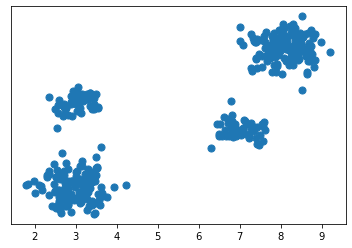

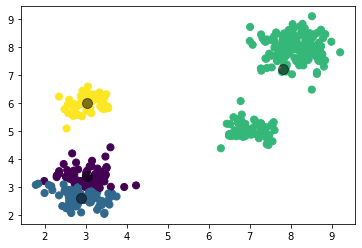

In [5]:

# 呈现未归集前的数据
plt.scatter(data[:, 0], data[:, 1], s=50)
plt.yticks(())
plt.show()
# 呈现分类后的数据
plt.scatter(data[:, 0], data[:, 1], c=y_kmean, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=0.5)
plt.show()

In [6]:
from sklearn.cluster import KMeans
#调库方式实现Kmeans
#1.指定K
k=4

# 2. 模型构建
km = KMeans(n_clusters=k, init='k-means++', max_iter=30)
km.fit(data)

# 获取簇心
centroids = km.cluster_centers_
# 获取归集后的样本所属簇对应值
y_kmean = km.predict(data)


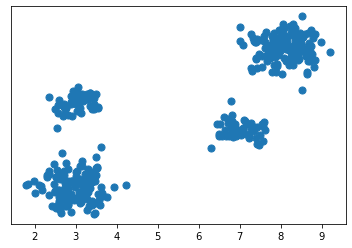

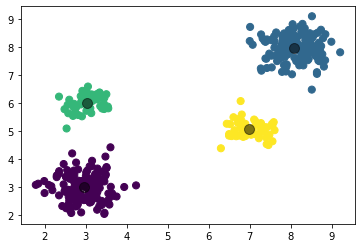

In [7]:

# 呈现未归集前的数据
plt.scatter(data[:, 0], data[:, 1], s=50)
plt.yticks(())
plt.show()

plt.scatter(data[:, 0], data[:, 1], c=y_kmean, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=0.5)
plt.show()

In [9]:
#numpy数组过滤总结
print("2维数组示例============================================")
data = np.array([[20,35],[20,20],[1,20]])
print(data.shape)
y_mean=np.array([0,1,1])
print(y_mean.shape)
filterArray =(y_mean ==1)

print( data[filterArray])

print("3维数组示例============================================")
data = np.random.randint(0,3,size=(2,3,4))
print(data)
print(data.shape)
y_mean=np.array([0,1])
print(y_mean.shape)
filterArray =(y_mean ==1)
print(filterArray)
print( data[filterArray])

2维数组示例============================================
(3, 2)
(3,)
[[20 20]
 [ 1 20]]
3维数组示例============================================
[[[1 0 2 0]
  [1 1 0 1]
  [1 2 2 2]]

 [[1 1 0 0]
  [0 2 1 0]
  [2 0 0 2]]]
(2, 3, 4)
(2,)
[False  True]
[[[1 1 0 0]
  [0 2 1 0]
  [2 0 0 2]]]
